In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

['measurement', 'station']
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


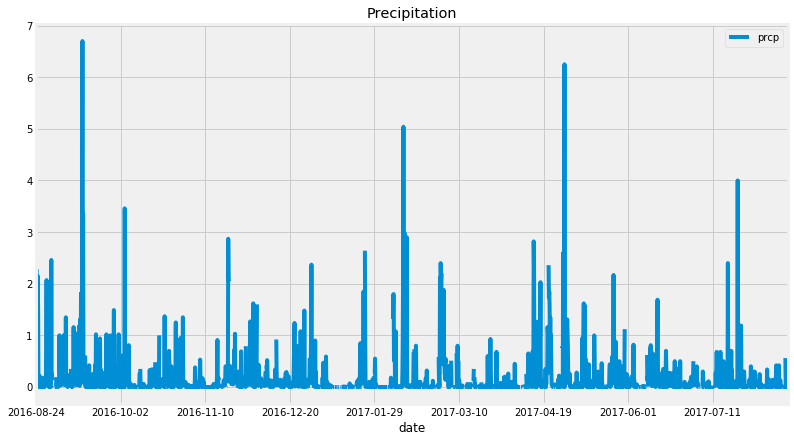

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
inspector = inspect(engine)
print(inspector.get_table_names())
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


## Calculate the date 1 year ago from the last data point in the database
# Latest Date = '2017-08-23'
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Perform a query to retrieve the data and precipitation scores
measurements = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
measurementsDF = pd.DataFrame(measurements)
# measurementsDF.set_index('date', inplace=True)
measurementsDF.head()

# Sort the dataframe by date
measurementsDF_sorted = measurementsDF.sort_values('date')

# plotting precipitations by date
measurementsDF_sorted.plot(x='date', y='prcp', title ="Precipitation", figsize=(12, 7))                                
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(measurementsDF_sorted.describe())

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
stationsCnt = session.query(Station).count()
print(stationsCnt)

9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

activeStations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activeStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

activeStationTemps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

activeStationTemps

[(54.0, 85.0, 71.66378066378067)]

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
[('USC00511918', 87.0), ('USC00513117', 85.0), ('USC00514830', 85.0), ('USC00516128', 84.0), ('USC00517948', 87.0), ('USC00518838', 83.0), ('USC00519281', 85.0), ('USC00519397', 87.0), ('USC00519523', 85.0)]
       station        date  tobs
0  USC00519281  2016-08-24  77.0
1  USC00519281  2016-08-25  80.0
2  USC00519281  2016-08-26  80.0
3  USC00519281  2016-08-27  75.0
4  USC00519281  2016-08-28  73.0


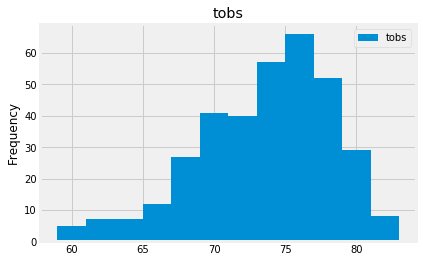

In [16]:
# Choose the station with the highest number of temperature observations.
stationCounts = session.query(Measurement.station, func.count(Measurement.tobs)).\
                group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
print(stationCounts)

stationWHighestObs=session.query(Measurement.station, func.max(Measurement.tobs)).group_by(Measurement.station).all()
print(stationWHighestObs)

# Query the last 12 months of temperature observation data for this station
highestStation12Mons = session.query(Measurement.station, Measurement.date, \
                                     Measurement.tobs).filter(Measurement.station =='USC00519281', \
                                                              Measurement.date > '2016-08-23').all()


highestStation12Mons

# plot the results as a histogram
HStation12MonsDF = pd.DataFrame(highestStation12Mons)
print(HStation12MonsDF.head())
HStation12MonsDF.hist(column='tobs', bins=12)
label = ["tobs"]
plt.legend(label)
plt.ylabel("Frequency")
plt.show()